# Nigeria Crime Analysis
This project contains the analysis of Crimes within Nigeria between the 1997 - 2024. The dataset codes the dates and locations of all reported political violence and protest events that occur within civil wars and periods of instability, public protest, and regime breakdown in Nigeria.

The data contain information on:
- _Dates and locations of conflict events_
- _Specific types of events including battles, civilian killings, riots, protests and recruitment activities_
- _Events by a range of actors, including rebels, governments, militias, armed groups, protesters and civilians_
- _Changes in territorial control_
- _Reported fatalities_

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
%matplotlib inline

## Data Preparation

In [7]:
crime_data = pd.read_csv("Nigeria_1997-2024_Sep20.csv")

In [357]:
crime_data.head(3)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598


In [11]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 38076 non-null  int64  
 16  regi

In [13]:
crime_data.shape

(38076, 31)

In [15]:
crime_data.nunique()

event_id_cnty         38076
event_date             6513
year                     28
time_precision            3
disorder_type             4
event_type                6
sub_event_type           24
actor1                  881
assoc_actor_1          1218
inter1                    8
actor2                  883
assoc_actor_2          1381
inter2                    9
interaction              43
civilian_targeting        1
iso                       2
region                    1
country                   1
admin1                   37
admin2                  751
admin3                    0
location               5116
latitude               4935
longitude              5013
geo_precision             3
source                 2824
source_scale             23
notes                 36356
fatalities              134
tags                    221
timestamp              2107
dtype: int64

In [9]:
# Dropping columns that contains just one value, irrelevant information, and columns with no value
crime_data.drop(['region', 'admin3','country', 'civilian_targeting' ,'tags', 'timestamp'],axis = 1, inplace = True)

In [11]:
# Saving precleaned data to a new variable name "ngn_crime"
ngn_crime = crime_data
ngn_crime.shape

(38076, 25)

In [13]:
# convert event_date column to datetime
ngn_crime['event_date'] = pd.to_datetime(ngn_crime['event_date'], errors='coerce')
print(ngn_crime['event_date'].dtype)

datetime64[ns]


In [15]:
#Inspect numerical data distribution
ngn_crime.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
event_date,38076,2019-02-12 17:11:51.377245440,1997-01-07 00:00:00,2016-10-27 00:00:00,2020-10-21 00:00:00,2022-11-04 00:00:00,2024-09-20 00:00:00,NaN
year,38076.0,2018.643502,1997.0,2016.0,2020.0,2022.0,2024.0,5.312043
time_precision,38076.0,1.109439,1.0,1.0,1.0,1.0,3.0,0.325537
inter1,38076.0,3.56621,1.0,2.0,3.0,5.0,8.0,1.717226
inter2,38076.0,3.779914,0.0,1.0,4.0,7.0,8.0,2.963821
interaction,38076.0,36.497085,10.0,16.0,37.0,50.0,88.0,17.550438
iso,38076.0,565.990493,204.0,566.0,566.0,566.0,566.0,1.855167
latitude,38076.0,8.760764,2.8559,6.4531,8.7,11.2002,13.8324,2.61134
longitude,38076.0,7.907555,1.3282,6.0789,7.3526,8.9,14.65,2.956555
geo_precision,38076.0,1.369078,1.0,1.0,1.0,2.0,3.0,0.516271


In [25]:
ngn_crime.head(1)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,actor2,...,admin1,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),NaN,...,Borno,Maiduguri Metro,Bolori,11.8826,13.089,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0


## Data Exploration

#### What types of political violence are most prevalent?

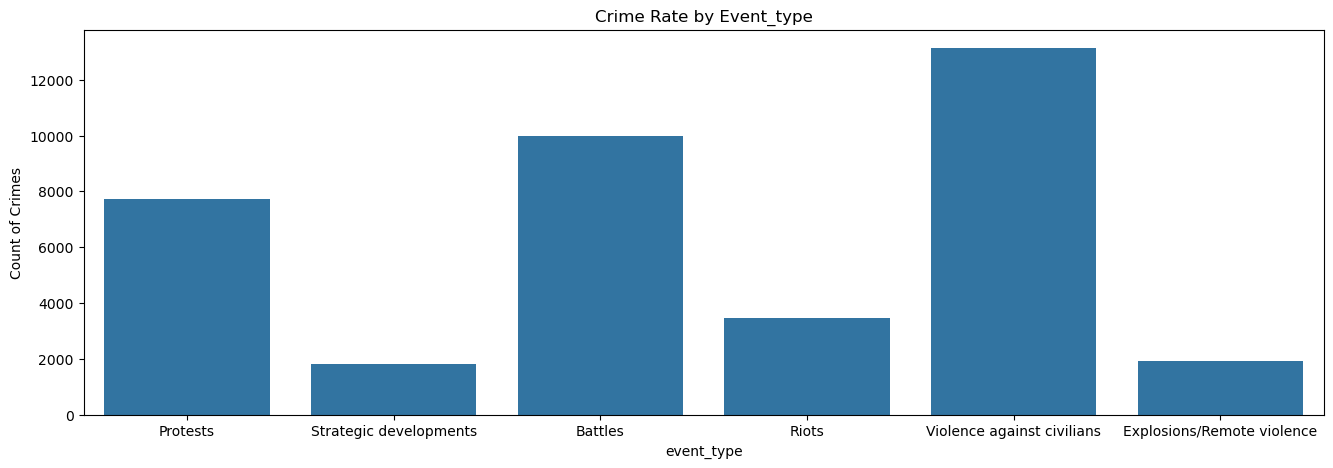

In [446]:
plt.figure(figsize= (16,5))
sns.countplot(data = ngn_crime, x = ngn_crime["event_type"])
plt.title('Crime Rate by Event Type')
plt.ylabel('Count of Crimes');

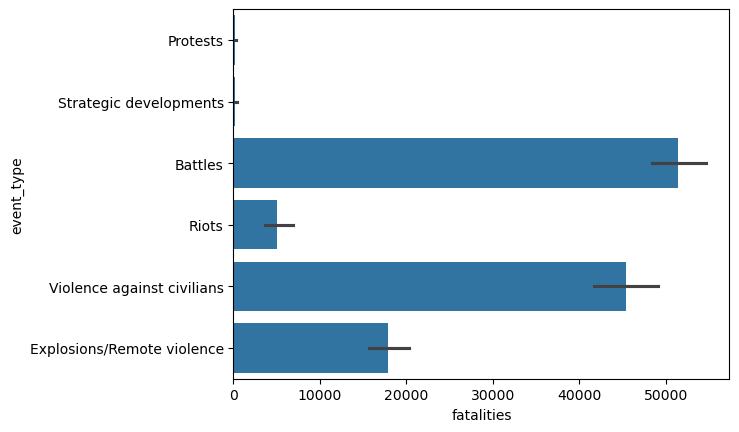

In [389]:
#What types of event_type have the most fatalities?
sns.barplot(data = ngn_crime, y = ngn_crime["event_type"],x = ngn_crime["fatalities"],estimator = "sum");

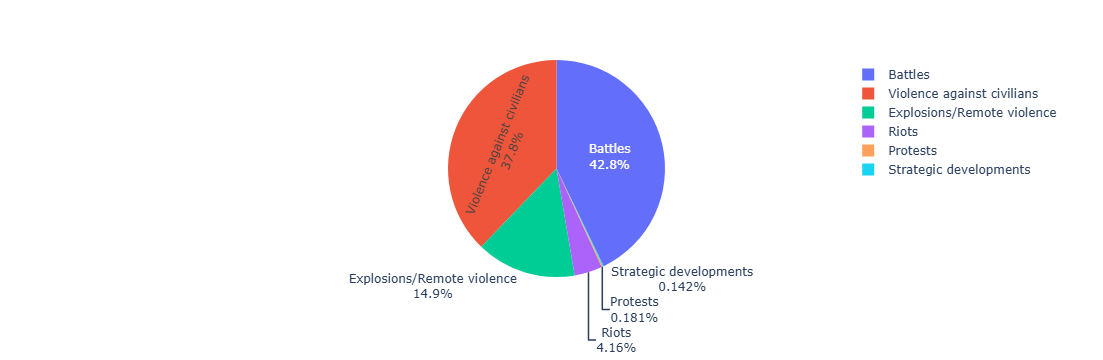

In [31]:
fatal_event = ngn_crime.pivot_table(index= ["event_type"], values = "fatalities" , aggfunc="sum").sort_values(by='fatalities',ascending = False)
fatal_event = fatal_event.reset_index()

fig = px.pie(fatal_event, values = 'fatalities', names = 'event_type')
fig.update_traces(textinfo='percent+label')
fig.show()

In [454]:
#What types of event_type and violence are most prevalent?
ngn_crime.pivot_table(index= ["event_type", "sub_event_type"], values = "event_id_cnty" , aggfunc="count").sort_values(by='event_id_cnty',ascending = False)

event_id_cnty
event_type                 sub_event_type                                    
Violence against civilians Attack                                       10129
Battles                    Armed clash                                   9633
Protests                   Peaceful protest                              7103
Violence against civilians Abduction/forced disappearance                2882
Riots                      Mob violence                                  1973
                           Violent demonstration                         1502
Strategic developments     Looting/property destruction                   825
Explosions/Remote violence Air/drone strike                               816
                           Remote explosive/landmine/IED                  700
Protests                   Protest with intervention                      446
Battles                    Government regains territory                   298
Explosions/Remote violence Suicide bomb                                   276
Strategic developments     Change to group/activity                       219
Protests                   Excessive force against protesters             190
Strategic developments     Other                                          185
                           Disrupted weapons use                          165
                           Arrests                                        164
                           Agreement                                      146
Violence against civilians Sexual violence                                123
Explosions/Remote violence Shelling/artillery/missile attack              108
Strategic developments     Non-violent transfer of territory               91
Battles                    Non-state actor overtakes territory             60
Explosions/Remote violence Grenade                                         23
Strategic developments     Headquarters or base established                19

In [456]:
#What types of event_type and violence are most fatal?
ngn_crime.pivot_table(index= ["event_type", "sub_event_type"], values = "fatalities" , aggfunc="sum").sort_values(by='fatalities',ascending = False)

fatalities
event_type                 sub_event_type                                 
Battles                    Armed clash                               48594
Violence against civilians Attack                                    44503
Explosions/Remote violence Air/drone strike                           9498
                           Remote explosive/landmine/IED              4403
Riots                      Mob violence                               4030
Explosions/Remote violence Suicide bomb                               3573
Battles                    Government regains territory               1968
Riots                      Violent demonstration                       967
Violence against civilians Sexual violence                             854
Battles                    Non-state actor overtakes territory         839
Explosions/Remote violence Shelling/artillery/missile attack           356
Protests                   Excessive force against protesters          217
Strategic developments     Disrupted weapons use                        87
                           Other                                        83
Explosions/Remote violence Grenade                                      33
Protests                   Peaceful protest                              0
                           Protest with intervention                     0
Strategic developments     Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Headquarters or base established              0
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
Violence against civilians Abduction/forced disappearance                0

<Axes: xlabel='count', ylabel='disorder_type'>

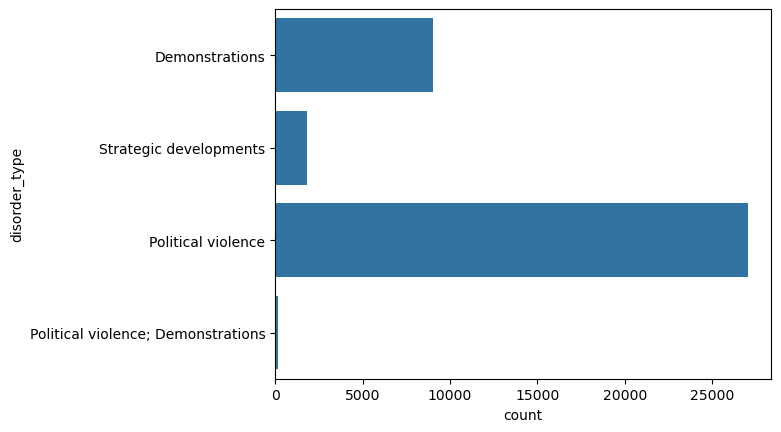

In [471]:
sns.countplot(ngn_crime['disorder_type'])

##### Insight:
Violence against civilians, Battles and Protests are the most prevalent crime events, with Battles and Violence against civilians being most fatal events with 42.8% and 37.8% recorded fatalities respectively.

The amount of Protest events seems to be high, however these protests are peaceful with just 0.181% recorded fatality.

#### Who are the primary actors involved in these events?

In [67]:
ngn_crime.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'iso', 'admin1', 'admin2', 'location', 'latitude',
       'longitude', 'geo_precision', 'source', 'source_scale', 'notes',
       'fatalities'],
      dtype='object')

In [70]:
# Description of what each numeric code of INTER1 represents
description = {
    1: "State Forces",
    2: "Rebel Groups",
    3: "Political Militias",
    4: "Identity Militias",
    5: "Rioters",
    6: "Protesters",
    7: "Civilians",
    8: "External/Other Forces"
}
fatalities_by_actor = ngn_crime.groupby(['inter1'])[['fatalities']].sum()
fatalities_by_actor['Actor Type'] = description.values() # Column to match numeric codes with text description
actor_counts = ngn_crime.groupby('inter1')['actor1'].nunique() # Number of actors in each crime group
fatalities_by_actor['No. of Actors'] = actor_counts.values
fatalities_by_actor

,fatalities,Actor Type,No. of Actors
inter1,,,
1,36850,State Forces,34
2,24459,Rebel Groups,16
3,15818,Political Militias,136
4,36332,Identity Militias,668
5,4841,Rioters,3
6,143,Protesters,7
7,0,Civilians,1
8,1562,External/Other Forces,16


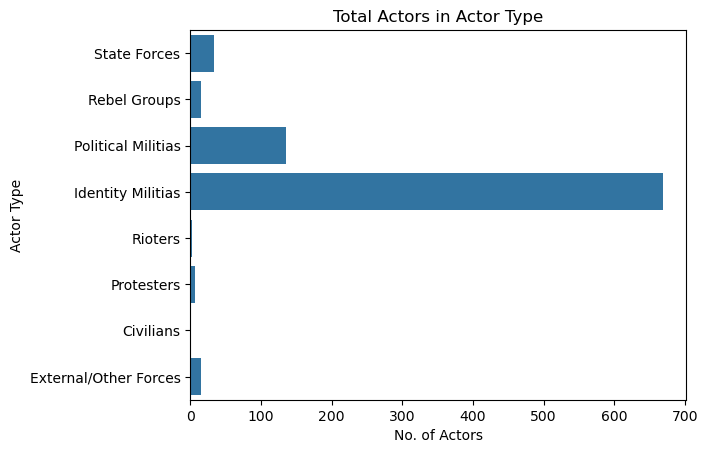

In [72]:
sns.barplot(data = fatalities_by_actor, y = 'Actor Type', x = 'No. of Actors')
plt.title('Total Actors in Actor Type');

#### What are the trends in political violence over time?

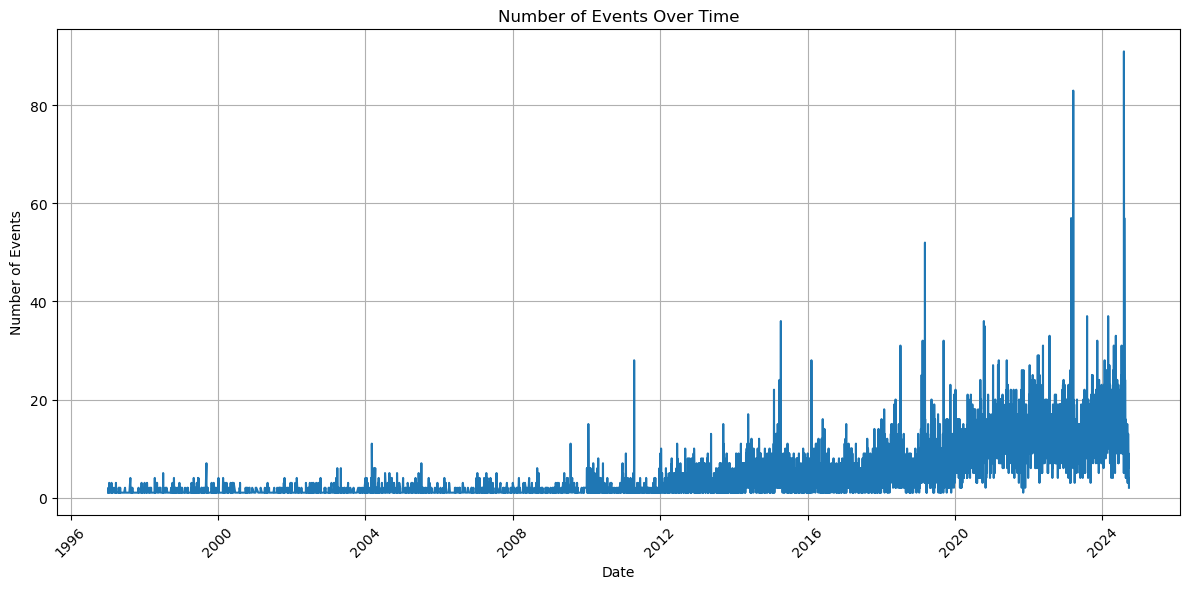

In [56]:

events_per_day = ngn_crime.groupby('event_date').size()

plt.figure(figsize=(12, 6))
plt.plot(events_per_day.index, events_per_day.values)
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to make room for rotated labels

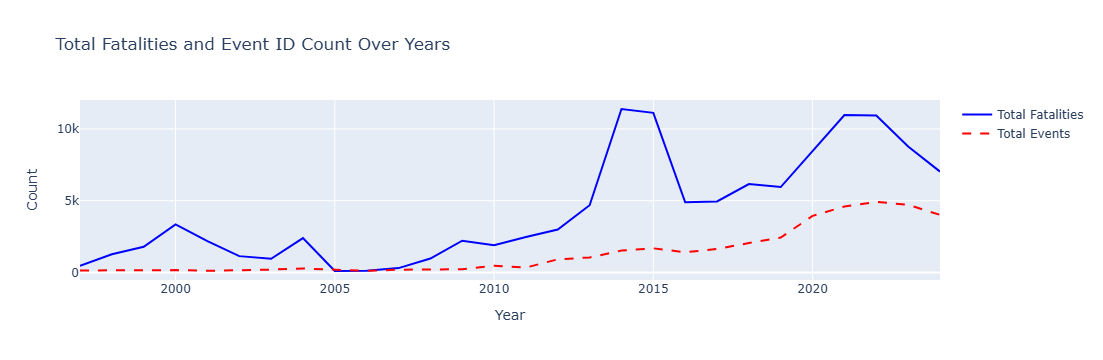

In [213]:
# Grouping by year to get total fatalities
fatality_per_year = ngn_crime.groupby('year')['fatalities'].sum()

# Grouping by year to get count of event_id
event_count_per_year = ngn_crime.groupby('year')['event_id_cnty'].count()

# Create a figure
fig = go.Figure()

# Add the total fatalities line
fig.add_trace(go.Scatter(
    x=fatality_per_year.index,
    y=fatality_per_year.values,
    mode='lines',
    name='Total Fatalities',
    line=dict(color='blue')
))

# Add the event_id_cnty count as a dashed red line
fig.add_trace(go.Scatter(
    x=event_count_per_year.index,
    y=event_count_per_year.values,
    mode='lines', 
    name='Total Events',
    line=dict(color='red', dash='dash')
))

# Update layout
fig.update_layout(title='Total Fatalities and Event ID Count Over Years',
                  xaxis_title='Year',
                  yaxis_title='Count')

# Show the figure
fig.show()


##### Insight
There's an increasing trend in the number of recorded events.

Note: Recorded date ends 20th of September 2024; which means the data isn't showing record for the whole of 2024

#### What is the geographic distribution of conflict events?

Text(0, 0.5, 'Total Recorded Event')

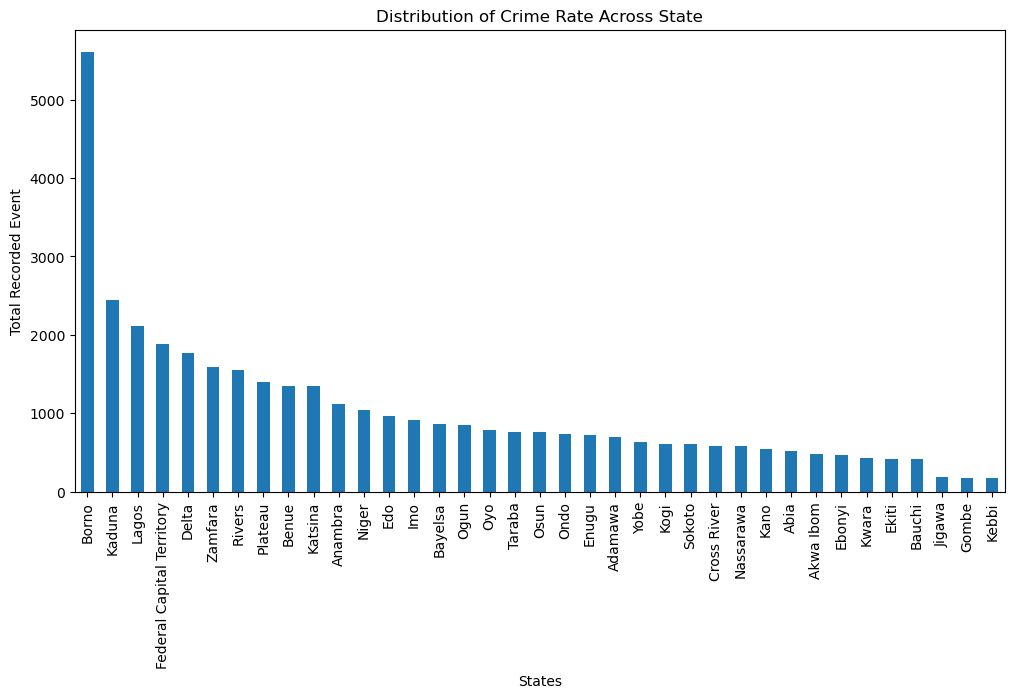

In [35]:
plt.figure(figsize = (12,6))
conflict_state = ngn_crime['admin1'].value_counts()
conflict_state.plot(kind = 'bar')
plt.title('Distribution of Crime Rate Across State')
plt.xlabel('States')
plt.ylabel('Total Recorded Event')

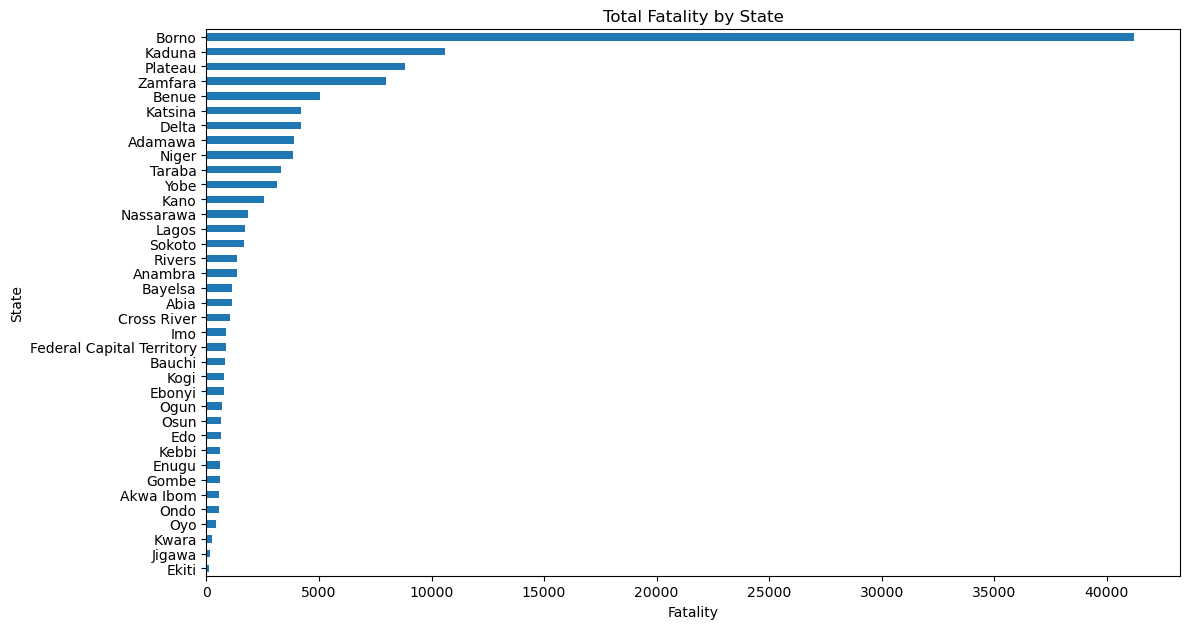

In [430]:

# Group by 'admin1' and sum the 'fatalities' column
aggregated_data = ngn_crime.groupby('admin1')['fatalities'].sum().sort_values(ascending=True)

# Rename the columns for clarity
aggregated_data.columns = ['Country', 'total_fatalities']

# Visualize 
plt.figure(figsize= (12, 6))
aggregated_data.plot(kind = 'barh')
plt.tight_layout()
plt.title("Total Fatality by State")
plt.ylabel("State")
plt.xlabel("Fatality");

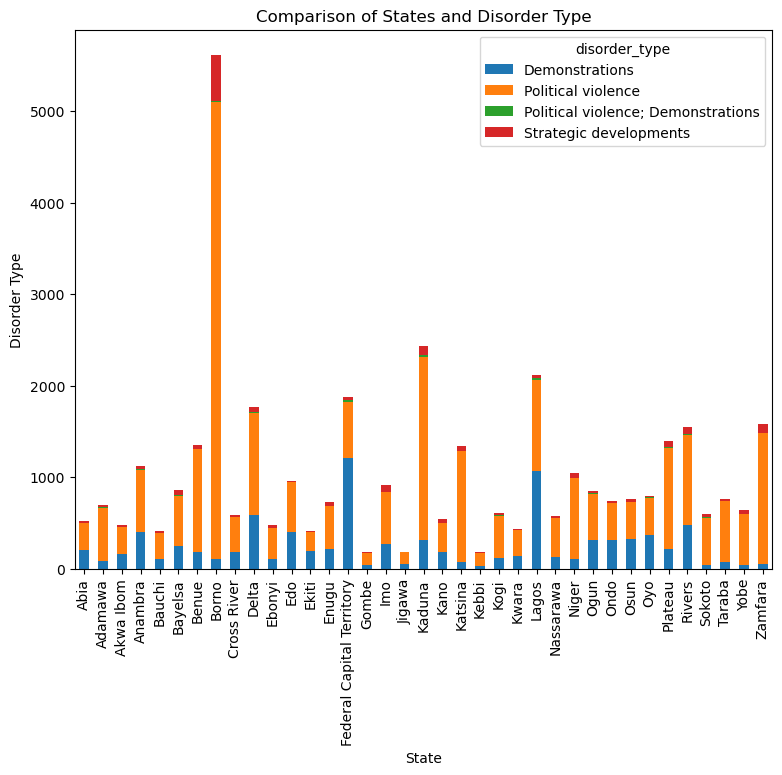

In [37]:
country_do_type = ngn_crime.groupby(['admin1', 'disorder_type'])['admin1'].count().unstack('disorder_type')
fig, ax = plt.subplots(figsize=(9,7)) # increase the figure size here

country_do_type.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('State')
ax.set_ylabel('Disorder Type')
ax.set_title('Comparison of States and Disorder Type')
plt.show()

In [50]:
# Zooming into the Top 3 states with high fatalities

# Create the pivot table
location_fatality = ngn_crime.pivot_table(index=["admin1", "admin2"], values="fatalities", aggfunc="sum").reset_index()

# Filter using query
filtered_location_fatality = location_fatality.query("admin1 in ['Borno', 'Kaduna', 'Plateau']")

# Set the index back if needed
filtered_location_fatality.set_index(["admin1", "admin2"], inplace=True)


In [52]:
filtered_location_fatality = filtered_location_fatality.reset_index()

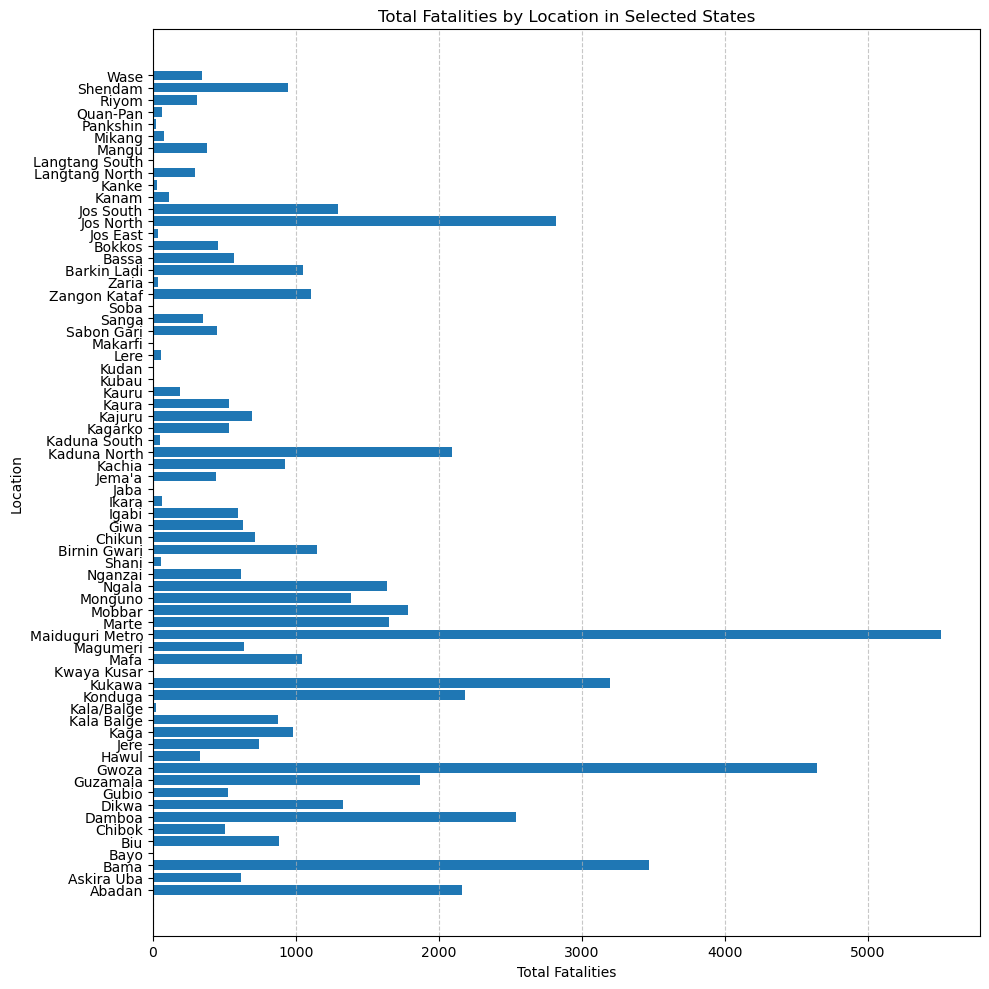

In [54]:
# Visualize
plt.figure(figsize= (10, 10))
plt.barh(filtered_location_fatality['admin2'], filtered_location_fatality['fatalities'])
plt.xlabel('Total Fatalities')
plt.ylabel('Location')
plt.title('Total Fatalities by Location in Selected States')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

##### Insights
A general assumption would be that the Northern Region of Nigeria is less peaceful considering the high record of fatality; States like Borno, Kaduna, Plateau, and Zamfara appears to be the most affected states with the highest damage in Borno(especially maiduguri the capital and largest city in Borno state)

While Jigawa, Gombe and Kebbi have been the most peaceful with less than 200 record of crime in the last 27 years 

#### Analyisis of Crime in Borno

In [57]:
borno = ngn_crime[ngn_crime['admin1'] == 'Borno']

<Axes: ylabel='admin1,admin2'>

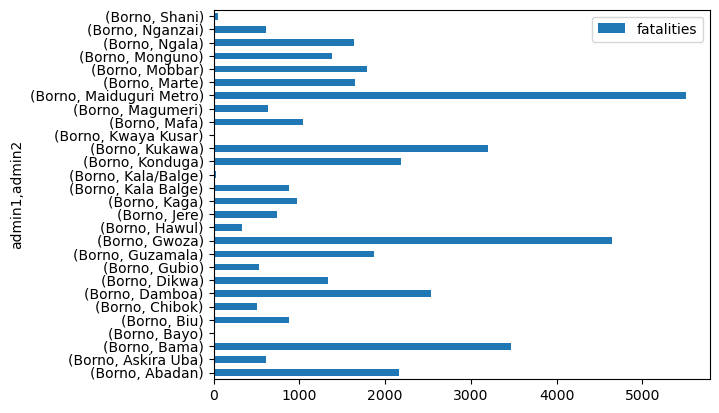

In [43]:
#Focusing on Borno state
bornu_location_fatality = location_fatality.query("admin1 in ['Borno']")

# Set the index back if needed
bornu_location_fatality.set_index(["admin1", "admin2"], inplace=True)

bornu_location_fatality.plot(kind = 'barh')

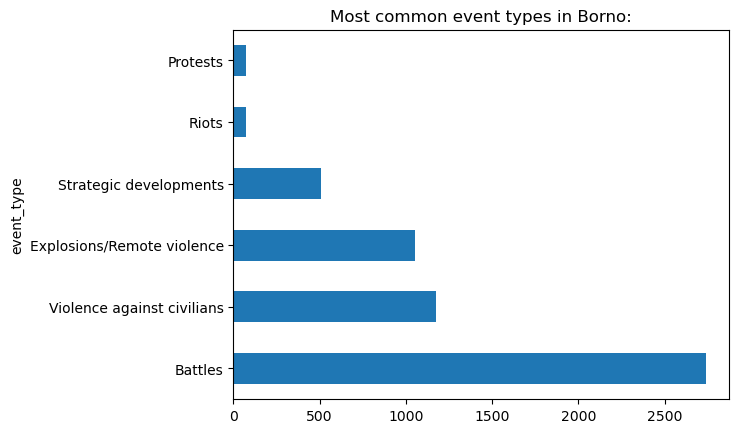

In [61]:
event_types = borno.groupby('event_type').size().sort_values(ascending=False)
event_types.plot(kind = 'barh')
plt.title("Most common event types in Borno:");

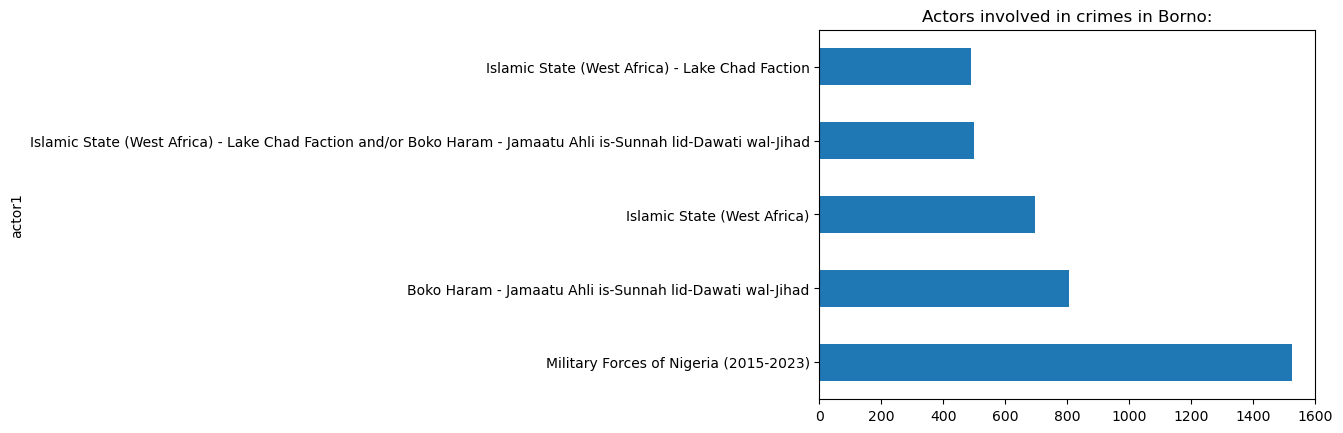

In [64]:
event_types = borno.groupby('actor1').size().sort_values(ascending=False)
event_types.head(5).plot(kind = 'barh', title = "Actors involved in crimes in Borno:");

Text(0.5, 1.0, 'Number of crimes ')

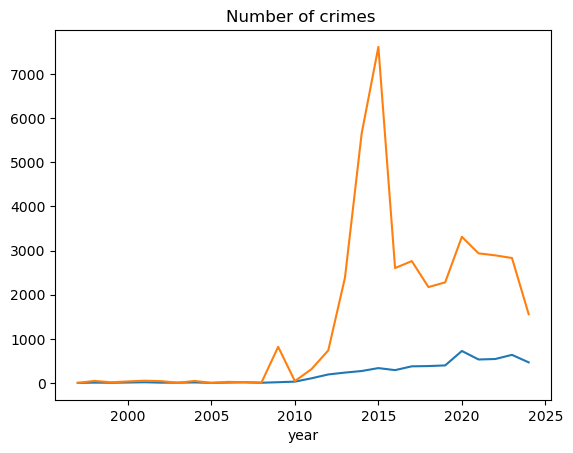

In [78]:
# Trend of Crimes in Borno
borno.groupby(['year'])['year'].count().plot()
borno.groupby(['year'])['fatalities'].sum().plot()
plt.title('Number of crimes ')

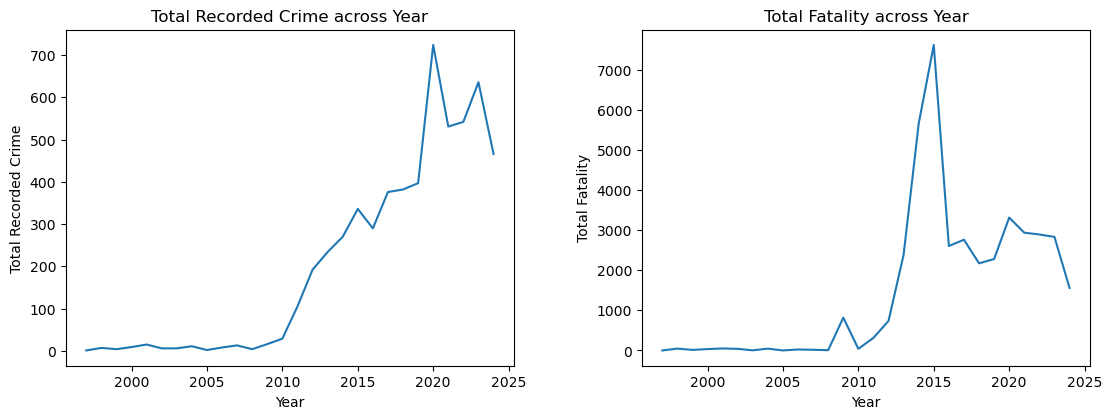

In [94]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # total_event axes
axes2 = fig.add_axes([1.0, 0.1, 0.7, 0.7]) # fatality axes

# Larger Figure Axes 1
axes1.plot(borno.groupby(['year'])['year'].count())
axes1.set_xlabel('Year')
axes1.set_ylabel('Total Recorded Crime')
axes1.set_title('Total Recorded Crime across Year')

# Insert Figure Axes 2
axes2.plot(borno.groupby(['year'])['fatalities'].sum())
axes2.set_xlabel('Year')
axes2.set_ylabel('Total Fatality')
axes2.set_title('Total Fatality across Year');

##### Insight
Zooming into Borno State Crime to see the reasons/causes of such high crime and fatality records, it appears the Military Force, Boko Haram, and Islamic State-Lake Chad Faction were the major actors resulting in the high record of Battles, Violence against Civilians, and Explosion were the major actors in this tragegic crimes around Borno State.

The total recorded crime has seriously increase since 2009; with 2015 having the highest fatality in Borno State.